# Resampling

Procedures to perform population based statistical inferences, while living within our data. 

## Bootstrap

The bootstrap is a resampling procedure that can be used to estimate statistics such as the mean or standard deviation. 


It can be used to calculate confidence intervals and hypothesis testing. 

It is a non-parametric method: It makes no assumptions about the distribution of the data.

### Example 1: Bootstrap for the mean

The distribution associated with a die is discrete and uniform.

the mean of a die is 3.5. We could use the CLT to estimate this mean, for example, by taking multiple samples of size 50, calculating the mean of each sample, and then taking the mean of the means.



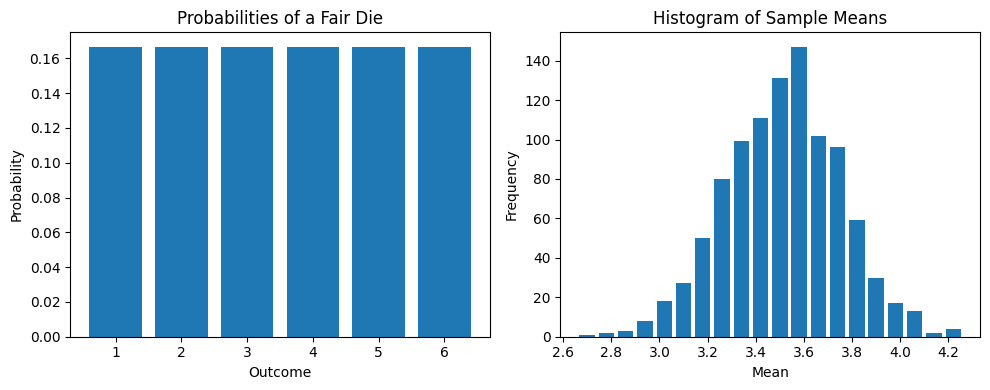

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of a fair die
probabilities = np.ones(6) / 6

# Generate 100 samples of 50 die rolls
samples = np.random.choice(np.arange(1, 7), size=(1000, 50))

# Calculate the means of each sample
sample_means = np.mean(samples, axis=1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the bar plot of probabilities on the left subplot
axs[0].bar(np.arange(1, 7), probabilities)
axs[0].set_title('Probabilities of a Fair Die')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Probability')

# Plot the histogram of sample means on the right subplot
axs[1].hist(sample_means, bins=20, rwidth=0.8)
axs[1].set_title('Histogram of Sample Means')
axs[1].set_xlabel('Mean')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

But what if we had a single sample of size 50? How could we estimate the mean of the die?

This is where the bootstrap comes in: we can resample from our sample to estimate the mean of the die.

  > the distribution of the mean re-samples **with replacement** is an approximation of the sampling distribution of the mean.
  

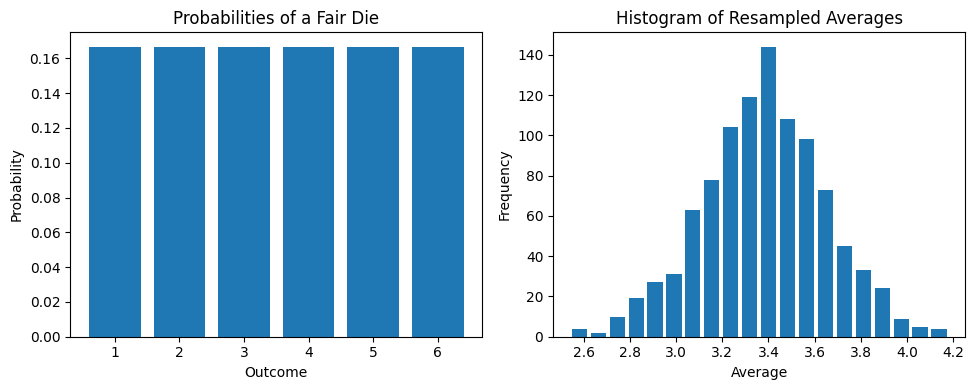

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of a fair die
probabilities = np.ones(6) / 6

# Generate a single sample of 5 rolls of the die
sample = np.random.choice(np.arange(1, 7), size=50)

# Perform 100 resampling iterations
resampled_averages = []
for _ in range(1000):
    resample = np.random.choice(sample, size=50, replace=True)
    resampled_averages.append(np.mean(resample))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the bar plot of probabilities on the left subplot
axs[0].bar(np.arange(1, 7), probabilities)
axs[0].set_title('Probabilities of a Fair Die')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Probability')

# Plot the histogram of resampled averages on the right subplot
axs[1].hist(resampled_averages, bins=20, rwidth=0.8)
axs[1].set_title('Histogram of Resampled Averages')
axs[1].set_xlabel('Average')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Take Away

The bootstrap principle is applicable to any summary statistic. 

Given we don't know the sampling distribution, we can approximate the sampling distribution by resampling from our sample.

It is generally used to constuct confidence intervals and perform hypothesis testing.

For this purpose, we can perform the above simulations again. If we take the standard deviation, that is our estimate of the standard error of the mean.


### Example 2: Bootstrap for the Standard deviation.

Suppose you have a sample of size 50 from a normal binomial distribution with n=10 and p=0.5.

Use the bootstrap method to estimate the standard error of the mean.



In [2]:
import numpy as np

# set seed to 42 so we all get the same results
np.random.seed(42)

# Samples from a binomial distribution
samples = np.random.binomial(10, 0.5, size=50)


### Bootstrap Summary

- Use the bootstrap to approximate the sampling distribution of a statistic.


The general procedure is as follows:

- Take a random sample of size n from the population.
- Calculate the statistic of interest.
- Repeat steps 1 and 2 B times.
- Use the distribution of the B statistics to approximate the sampling distribution of the statistic of interest.
 


## Pemutation Tests

Used in the case of two samples, to test the null hypothesis that the two populations are identical.

  > this is a situation where you would use a t-test.

Permutation tests are a non-parametric test that can be used to test the null hypothesis that two populations are identical.

For example, you might have performed a t-test already, but are not confident that the assumptions of the t-test are met, namely the sample size. 

The procedure is as follows:

- Combine the two samples into a single sample.
- Randomly assign the observations to two groups of size n1 and n2.
- Calculate the test statistic, e.g. your t-statistic.
- Repeat steps 2 and 3 B times.
- Calculate the p-value as the proportion of times that the test statistic was greater than or equal to the observed test statistic.
 
  > The question here is: If we remove the labels, mix the groups, How likely is it that we would get a test statistic as extreme as the one we observed?

### Example 1: Permutation test for the mean


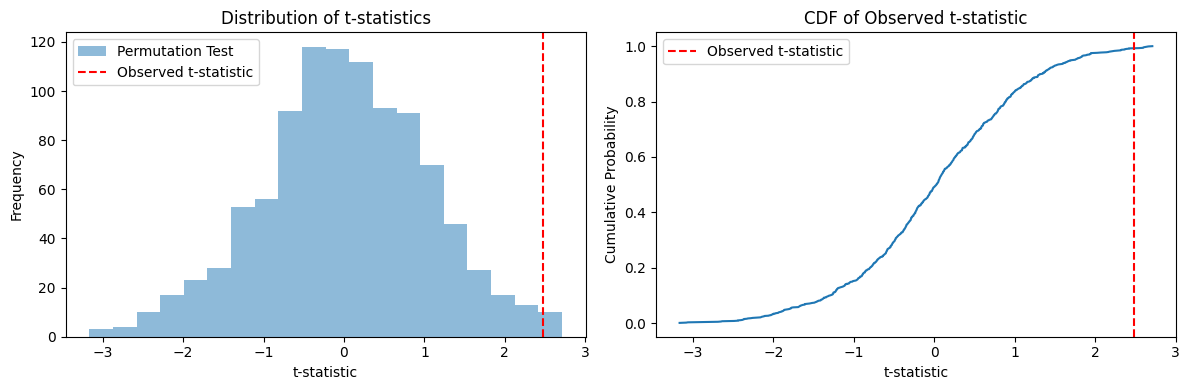

t-statistic: 2.48, p-value: 0.01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from utilities.plot_utilities import plot_t_test
# Set random seed for reproducibility
np.random.seed(0)

# Generate two samples with different means
sample1 = np.random.normal(loc=1, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=1, size=100)

# Perform t-test and calculate t-statistic
t_stat, p_value = ttest_ind(sample1, sample2)

# Perform permutation test and collect t-statistics
perm_t_stats = []
for _ in range(1000):
    # Randomly permute group labels
    permuted_labels = np.random.permutation(np.concatenate((sample1, sample2)))
    perm_sample1 = permuted_labels[: len(sample1)]
    perm_sample2 = permuted_labels[len(sample1) :]

    # Perform t-test on permuted samples and calculate t-statistic
    perm_t_stat, _ = ttest_ind(perm_sample1, perm_sample2)
    perm_t_stats.append(perm_t_stat)

# permutation p-value
p_value = np.sum(np.array(perm_t_stats) >= t_stat) / len(perm_t_stats)
# Create a figure with two subplots

plot_t_test(perm_t_stats, t_stat)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")

Play with the parameters of the samples above to appreciate the impact on the permutated distribution of the t-test.

### Exercises

#### Exercise 1: Bootstrap for the mean

Suppose you ran a survey and asked people how many hours they slept last night. You have a sample of size 50.

Use the bootstrap method to estimate the standard error of the mean.

**Hint**: Use the `np.random.choice` function to resample from your sample. You can set the `replace` argument to `True` to sample with replacement: 
    
```python
my_sample= [1,2,3,4,5,6]
one_bootstrap= np.random.choice(sample, size=5, replace=True) # sampling 5 times with replacement
```




In [1]:
## generate data for a survey on sleep duration, single sample of 50 people. set seed to 42

from utilities.exercise_utils import sleep_survey_data

sleep_data= sleep_survey_data()

# Use bootstrap sampling to estimate the 95% confidence interval



#### Exercise 2: Permutation testing

Suppose you are measuring the effectiveness of a new drug. You have two samples of size 50, one from the control group and one from the treatment group.

Use the permutation method to test the null hypothesis that the two populations are identical.



In [1]:
from utilities.exercise_utils import drug_test_experiment

treatment_group, control_group = drug_test_experiment()

# use permutation test to test the null hypothesis that the drug has no effect on sleep duration